# Introduction

The objective of this notebook is to implement a simple object tracker. In this case, we will be detecting a yellow ball. 

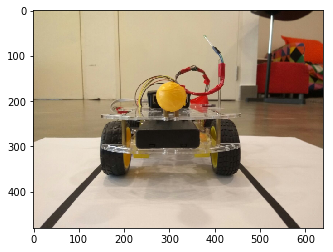

In [1]:
# Import the required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

bgr = cv2.imread("/Users/johnreid/capstone/pics/ball_centre.jpeg")
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB) # Convert from BGR (OpenCV default) to RGB colorspace

# Resize the image to make it easier to process
rgb = cv2.resize(rgb, (640, 480))

plt.imshow(rgb)
plt.show()

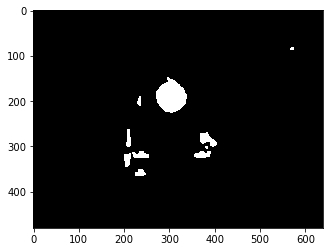

In [5]:
# Blur the image to reduce noise
rgb_blur = cv2.GaussianBlur(rgb, (11, 11), 0)

# Convert to HSV color space
hsv = cv2.cvtColor(rgb_blur, cv2.COLOR_RGB2HSV)

# Define an acceptable range for detecting the color yellow in HSV space
yellow_HSV_lower = (15, 120, 120)
yellow_HSV_upper = (30, 255, 255)

# Take a binary mask of all pixels that are yellow. Erode and dilate the shape to remove small abnormalities
mask = cv2.inRange(hsv, yellow_HSV_lower, yellow_HSV_upper)
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)
plt.imshow(mask, cmap = "Greys_r")
plt.show()

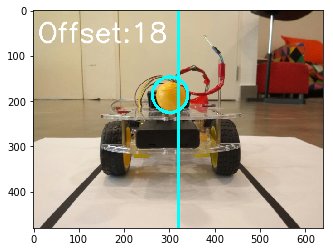

In [6]:
# Find the shapes in the previous image
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)[-2]

# only proceed if at least one contour was found
if len(cnts) > 0:
        # find the largest contour in the mask, then use
        # it to compute the minimum enclosing circle and
        # centroid
    c = max(cnts, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    centre = (int(x), int(y))
    radius = int(radius)


# only proceed if the radius meets a minimum size
if radius > 10:
# draw the circle and centroid on the frame
    cv2.circle(rgb, (centre[0], centre[1]), radius, (0, 255, 255), 5)
    height = rgb.shape[0]
    width = rgb.shape[1]
    cv2.line(rgb,(width/2, 0),(width/2, height),(0,255,255),5)
    font = cv2.FONT_HERSHEY_SIMPLEX
    offset = rgb.shape[1]/2 - centre[0]
    cv2.putText(rgb,'Offset:%d' % offset,(10,70), font, 2,(255,255,255),3,cv2.LINE_AA)
    plt.imshow(rgb)
    plt.show()

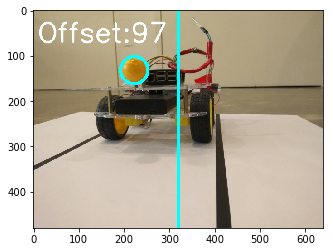

In [7]:
# Try again with a different image, with the ball at a greater offset

bgr = cv2.imread("/Users/johnreid/capstone/pics/ball_left.jpeg")
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
rgb = cv2.resize(rgb, (640, 480))
rgb_blur = cv2.GaussianBlur(rgb, (11, 11), 0)
hsv = cv2.cvtColor(rgb_blur, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, (15, 120, 120), (30, 255, 255))
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)[-2]

# only proceed if at least one contour was found
if len(cnts) > 0:
        # find the largest contour in the mask, then use
        # it to compute the minimum enclosing circle and
        # centroid
    c = max(cnts, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)
    centre = (int(x), int(y))
    radius = int(radius)


# only proceed if the radius meets a minimum size
if radius > 10:
# draw the circle and centroid on the frame
    cv2.circle(rgb, (centre[0], centre[1]), radius, (0, 255, 255), 5)
    height = rgb.shape[0]
    width = rgb.shape[1]
    cv2.line(rgb,(width/2, 0),(width/2, height),(0,255,255),5)
    font = cv2.FONT_HERSHEY_SIMPLEX
    offset = rgb.shape[1]/2 - centre[0]
    cv2.putText(rgb,'Offset:%d' % offset,(10,70), font, 2,(255,255,255),3,cv2.LINE_AA)
    plt.imshow(rgb)
    plt.show()